![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions:

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [34]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns
# Start coding!

In [35]:
try:
    netflix_df = pd.read_csv('/Users/dani/Data Science/Projects/DataCamp Projects/Investigating Netflix Movies/netflix_data.csv')
except:
    print('There are issues with your data.')

In [36]:
netflix_df.info

<bound method DataFrame.info of      show_id     type                                    title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                     7:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7782   s7783    Movie                                     Zozo   
7783   s7784    Movie                                   Zubaan   
7784   s7785    Movie                        Zulu Man in Japan   
7785   s7786  TV Show                    Zumbo's Just Desserts   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               director                                               cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel 

`Empty value search`

In [37]:
df_miss = (netflix_df.isnull().sum() / len(netflix_df)) * 100
df_miss = df_miss.drop(df_miss[df_miss == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_miss})
missing_data.head(10)

,Missing Ratio
director,30.679337
cast,9.220496
country,6.510851
date_added,0.128419


/opt/homebrew/lib/python3.11/site-packages/seaborn/categorical.py:2745: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


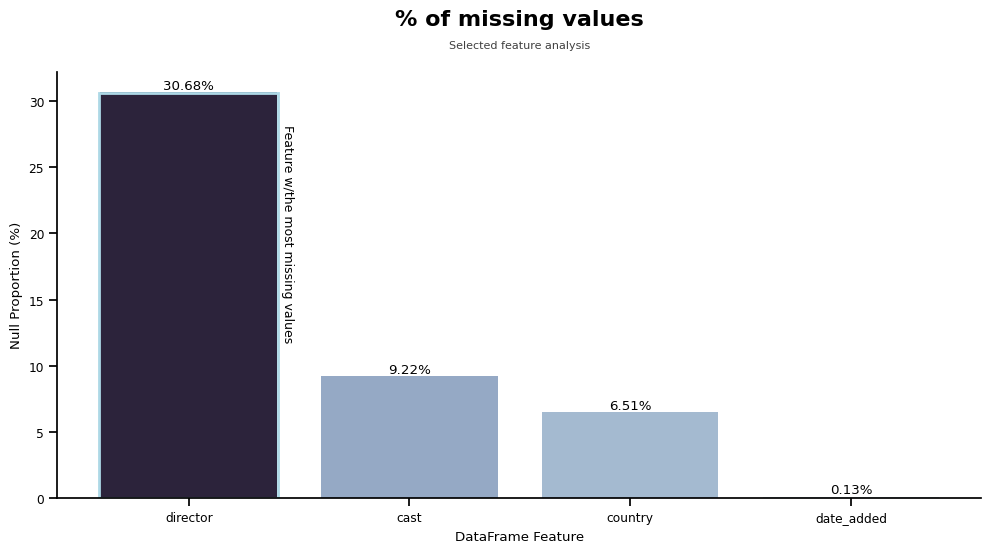

In [38]:
sns.set_context("notebook", font_scale=.8)

fig, ax = plt.subplots(figsize=(10, 8))
plt.close()
g = sns.catplot(data=missing_data,
            x=missing_data.index,
            y='Missing Ratio',
            kind='bar',
            hue='Missing Ratio',
            height=5,
            aspect=2,
            legend=None,
            #color= '#9999CC',
            palette="ch:s=.25,rot=-.25",
            ax=ax
            )

ax = g.facet_axis(0, 0)
for c in ax.containers:
    labels = [f'{(v.get_height()):.2f}%' for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', color='black')

g.set(xlabel='DataFrame Feature', ylabel='Null Proportion (%)')

ax.autoscale()
ax.text(x=0.5, y=1.1, s='% of missing values', fontsize=16, weight='bold', ha='center', va='bottom', transform=ax.transAxes)
ax.text(x=0.5, y=1.05, s='Selected feature analysis', fontsize=8, alpha=0.75, ha='center', va='bottom', transform=ax.transAxes)

from matplotlib.patches import Rectangle

ax.add_patch(Rectangle((-.405, 0), .81, 30.6, fill=False, edgecolor='lightblue', lw=2))
ax.text(0.42, 12, "Feature w/the most missing values", fontsize = 9, color = "black", rotation = -90)
# ax.text(-.55, 21)
plt.show()

In [39]:
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
duration           0
description        0
genre              0
dtype: int64

In [53]:
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country           81
date_added      1565
release_year      73
duration         206
description     7769
genre             35
dtype: int64

`Data type revision - 'date_added'`

In [40]:
netflix_df.dtypes
netflix_df['date_added'] = netflix_df['date_added'].astype('datetime64[ns]', errors='ignore')

In [41]:
display(netflix_df)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas
...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,"October 19, 2020",2005,99,When Lebanon's Civil War deprives Zozo of his ...,Dramas
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111,A scrappy but poor boy worms his way into a ty...,Dramas
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44,"In this documentary, South African rapper Nast...",Documentaries
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1,Dessert wizard Adriano Zumbo looks for the nex...,International TV


`TV Show removal`

In [42]:
netflix_subset = netflix_df.query("type != 'TV Show'")

`Movies subset`

In [43]:
netflix_movies = netflix_subset[['title', 'country', 'genre', 'release_year', 'duration']]

In [44]:
short_movies = netflix_movies[netflix_movies['duration'] < 60]

In [45]:
colors = []

for i in netflix_movies['genre']:
    if i == 'Children':
        colors.append('Green')
    elif i == 'Documentaries':
        colors.append('Yellow')
    elif i == 'Stand-Up':
        colors.append('Red')
    else:
        colors.append('Black')
    

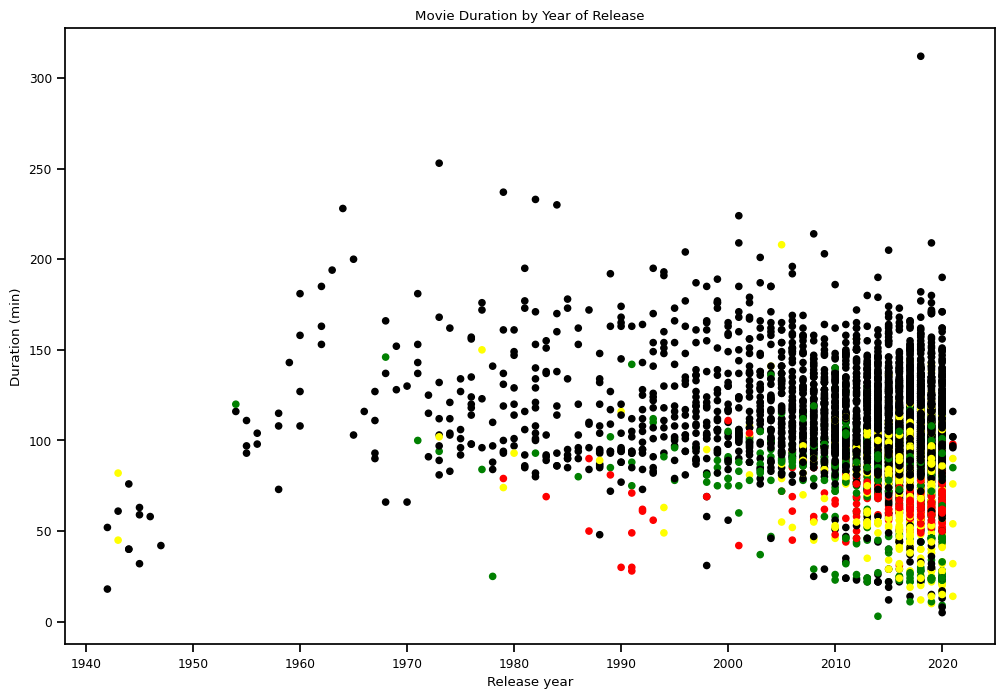

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
netflix_movies.plot(kind='scatter',x='release_year', y='duration', c=colors, ax=ax, title='Movie Duration by Year of Release')
ax.set_xlabel("Release year")
ax.set_ylabel("Duration (min)")
plt.show()

In [47]:
answer = 'maybe'